# MODEL PREDICTION FOR FRUIT PREDICTION

In [1]:
pwd

'/home/wsuser/work'

In [2]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_fcab021718db442d88e1c8c185481f57 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='TcFvaQsyIh-tmrps6Yks6NdeBnCT2E4bJqrMcCGNX6Jn',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.eu.cloud-object-storage.appdomain.cloud')

streaming_body_1 = client_fcab021718db442d88e1c8c185481f57.get_object(Bucket='fertilizers-donotdelete-pr-uvgsivosi2xndt', Key='Fertilizers_Recommendation_ System_For_Disease_ Prediction (2).zip')['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [3]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
file_paths=unzip.namelist()
for path in file_paths:
	unzip.extract(path)

In [4]:
ls

'Dataset Plant Disease'/   Fruit-classification.tgz


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [7]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [8]:
x_train=train_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/train",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [9]:
x_test=test_datagen.flow_from_directory(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test",target_size=(64,64),class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [10]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [12]:
model= Sequential()

In [13]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.add(Dense(300,activation='relu'))

In [18]:
model.add(Dense(150,activation='relu'))

In [19]:
model.add(Dense(6,activation='softmax'))

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [21]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

/tmp/wsuser/ipykernel_226/1582812018.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)


Epoch 1/10
225/225 [==============================] - 45s 195ms/step - loss: 0.6000 - accuracy: 0.7929 - val_loss: 0.3095 - val_accuracy: 0.8832
Epoch 2/10
225/225 [==============================] - 43s 193ms/step - loss: 0.2982 - accuracy: 0.8988 - val_loss: 0.2020 - val_accuracy: 0.9312
Epoch 3/10
225/225 [==============================] - 43s 190ms/step - loss: 0.2029 - accuracy: 0.9277 - val_loss: 0.3533 - val_accuracy: 0.8689
Epoch 4/10
225/225 [==============================] - 43s 191ms/step - loss: 0.1704 - accuracy: 0.9419 - val_loss: 0.1000 - val_accuracy: 0.9632
Epoch 5/10
225/225 [==============================] - 44s 196ms/step - loss: 0.1442 - accuracy: 0.9508 - val_loss: 0.1616 - val_accuracy: 0.9431
Epoch 6/10
225/225 [==============================] - 43s 192ms/step - loss: 0.1293 - accuracy: 0.9519 - val_loss: 0.1582 - val_accuracy: 0.9466
Epoch 7/10
225/225 [==============================] - 44s 195ms/step - loss: 0.1082 - accuracy: 0.9636 - val_loss: 0.1518 - val_ac

In [22]:
model.save('model_fruit.h5')

In [23]:
import numpy as np 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model= load_model('model_fruit.h5')

In [25]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/0bb8fb61-d561-43fd-89a3-d24d253adef9___JR_FrgE.S 2849.JPG")

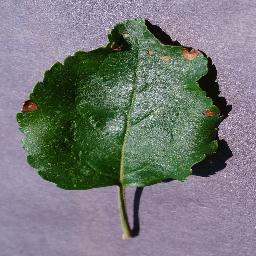

In [26]:
img

In [27]:
img = image.load_img(r"/home/wsuser/work/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/0bb8fb61-d561-43fd-89a3-d24d253adef9___JR_FrgE.S 2849.JPG",target_size=(64,64))

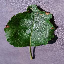

In [28]:
img

In [29]:
x=image.img_to_array(img)

In [30]:
x=np.expand_dims(x,axis=0)

In [31]:
y=np.argmax(model.predict(x),axis=1)

In [32]:
y

array([0])

In [33]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [34]:
index=['Apple___Black_rot', 'Apple___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy','Peach___Bacterial_spot','Peach___healthy']

In [35]:
index[y[0]]

'Apple___Black_rot'

# IBM DEPLOYMENT FOR FRUIT PREDICTION

In [54]:
pip install watson-machine-learning-client

Note: you may need to restart the kernel to use updated packages.


In [55]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
	"url":"https://eu-gb.ml.cloud.ibm.com",
	"apikey":"blyJyOvbJEy-LjIJWIAEeBen6voOl4Vk_BwhHIzLk4Nl"
}

In [56]:
client=APIClient(wml_credentials)

In [57]:
client

In [58]:
def guid_space_name(client,FERTILIZER_DEPLOYMENT):
	space=client.spaces.get_details()
	return(next(item for item in space['resources']if item['entity']['name']==FERTILIZER_DEPLOYMENT)['metadata']['id'])

In [59]:
space_uid=guid_space_name(client,'FERTILIZER_DEPLOYMENT')
print(space_uid)

bcea7c25-77c4-4a2e-8ae4-85d7fb01bc73


In [60]:
client.set.default_space(space_uid)

'SUCCESS'

In [61]:
client.software_specifications.list(100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1

In [62]:
software_space_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')

In [63]:
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [64]:
!tar -zcvf Fruit-classification.tgz model_fruit.h5

model_fruit.h5


In [47]:
model_details=client.repository.store_model(model='Fruit-classification.tgz',
	meta_props={
               client.repository.ModelMetaNames.NAME:"CNN Fruit Model Building",
		       client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
		       client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
                })

In [65]:
model_id = client.repository.get_model_id(model_details)

In [66]:
model_id

'81c727d1-3116-48c9-8730-95794c805d59'

In [52]:
client.repository.download(model_id,'frunit.tar.gb')

File with name: 'frunit.tar.gb' already exists.


WMLClientError: File with name: 'frunit.tar.gb' already exists.

In [67]:
ls

'Dataset Plant Disease'/    frunit.tar.gb
 Fruit-classification.tgz   model_fruit.h5
